In [6]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = df.dropna() 
df.head()
# I used the dataset employee attraction
# I didn't clean the data, because I thought that wasn't really necessary.
#to get rid of the empty cells I use dropna

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df['EducationField'].value_counts()
# to have a look at the educationfield column I used this.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

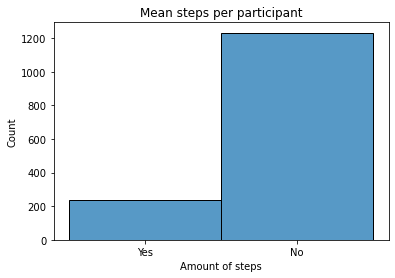

In [8]:
steps = sns.histplot(df['Attrition'], kde=False)
plt.title('Mean steps per participant')
plt.xlabel('Amount of steps')
plt.show()
# Here you see that a lot of participants have no attrition. So what we want is to see why they have a lot of attrition.

In [3]:
from sklearn.preprocessing import normalize

In [4]:
X = df[['Age', 'DistanceFromHome', 'DailyRate']]
X = normalize(X)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# I choose to do Age, distance from home and daily rate. Because I think these topics are related to the problem.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) 
knn = knn.fit(X_train, y_train)
knn.score(X_test, y_test)

# 80,5 % of employees is predicted accurately. 

0.8049886621315193

In [6]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred) 
cm

array([[347,  17],
       [ 69,   8]], dtype=int64)

In [7]:
conf_matrix = pd.DataFrame(cm, index=['Yes', 'No'], columns = ['Yes_p', 'No_p']) 
conf_matrix

,Yes_p,No_p
Yes,347,17
No,69,8


In [ ]:
#The way to read this (the matrix above) is that of the employees, 347 are correctly predicted as 'Yes Attrition', and 17 as No Attrition.

#𝑟𝑒𝑐𝑎𝑙𝑙=347/347+17=0,95
#𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=347/347+69=0,83 

# It can be concluded that it can be predicted well if you have the topics Age, DistanceFromHome and DailyRate. 
